# Task 2 · Data Science Lifecycle Planning

This notebook develops the project plan in line with Task 2 of the ITS8080 HEMS brief.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from pathlib import Path
from IPython.display import display

DATA_PATH = Path('..') / 'data' / 'raw' / 'train_252145.csv'
FIGURES_DIR = Path('..') / 'reports' / 'figures'
FIGURES_DIR.mkdir(parents=True, exist_ok=True)

In [2]:
# Load data and check missing values ratio
df = pd.read_csv(DATA_PATH, parse_dates=['timestamp']).set_index('timestamp')

print("Missing Values Ratio:")
display(df[['pv_mod1', 'pv_mod2', 'pv_mod3', 'pv', 'Demand', 'Price']].isna().mean().sort_values(ascending=False))

Missing Values Ratio:


pv_mod3    0.058226
pv_mod2    0.056057
pv_mod1    0.050006
pv         0.000000
Demand     0.000000
Price      0.000000
dtype: float64

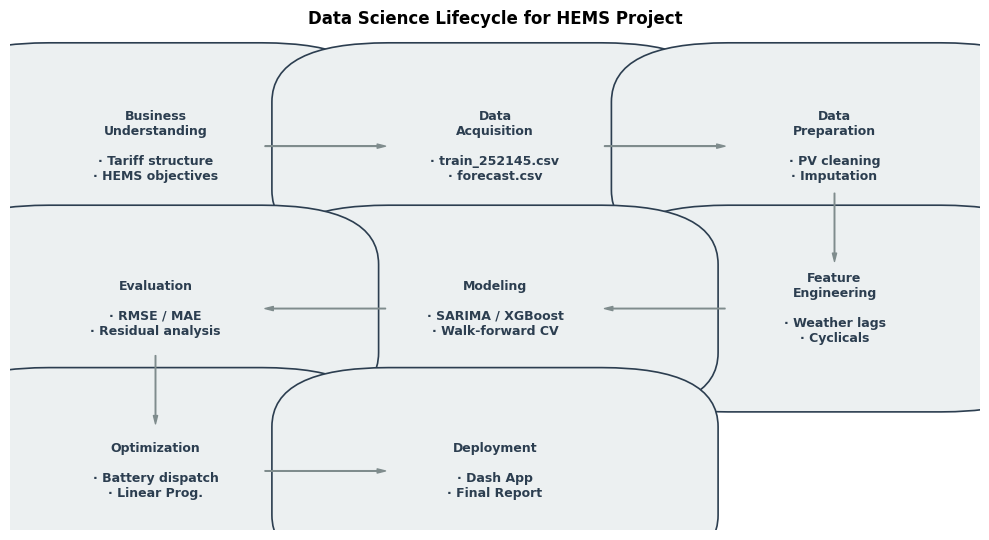

Lifecycle diagram saved to: ../reports/figures/02_lifecycle.png


In [4]:
# Visualize Data Science Lifecycle - Compact version for report
fig, ax = plt.subplots(figsize=(10, 5.5))
ax.axis('off')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

# Define steps with compact text (text, (x_center, y_center))
steps = [
  ('Business\nUnderstanding\n\n· Tariff structure\n· HEMS objectives', (0.15, 0.78)),
  ('Data\nAcquisition\n\n· train_252145.csv\n· forecast.csv', (0.5, 0.78)),
  ('Data\nPreparation\n\n· PV cleaning\n· Imputation', (0.85, 0.78)),
  
  ('Feature\nEngineering\n\n· Weather lags\n· Cyclicals', (0.85, 0.45)),
  ('Modeling\n\n· SARIMA / XGBoost\n· Walk-forward CV', (0.5, 0.45)),
  ('Evaluation\n\n· RMSE / MAE\n· Residual analysis', (0.15, 0.45)),
  
  ('Optimization\n\n· Battery dispatch\n· Linear Prog.', (0.15, 0.12)),
  ('Deployment\n\n· Dash App\n· Final Report', (0.5, 0.12))
]

# Draw boxes (smaller)
box_width = 0.22
box_height = 0.18
for text, (x, y) in steps:
    box = FancyBboxPatch((x - box_width/2, y - box_height/2), box_width, box_height, 
                         boxstyle='round,pad=0.015', 
                         ec='#2c3e50', fc='#ecf0f1', lw=1.2,
                         mutation_scale=8)
    ax.add_patch(box)
    ax.text(x, y, text, ha='center', va='center', fontsize=9, color='#2c3e50', fontweight='bold')

# Draw arrows (thinner)
arrow_style = 'simple,tail_width=0.4,head_width=3,head_length=6'
connection_color = '#7f8c8d'

# Row 1: Left -> Right
ax.add_patch(FancyArrowPatch((0.26, 0.78), (0.39, 0.78), arrowstyle=arrow_style, color=connection_color))
ax.add_patch(FancyArrowPatch((0.61, 0.78), (0.74, 0.78), arrowstyle=arrow_style, color=connection_color))

# Row 1 -> Row 2 (Down)
ax.add_patch(FancyArrowPatch((0.85, 0.69), (0.85, 0.54), arrowstyle=arrow_style, color=connection_color))

# Row 2 (Right to Left)
ax.add_patch(FancyArrowPatch((0.74, 0.45), (0.61, 0.45), arrowstyle=arrow_style, color=connection_color))
ax.add_patch(FancyArrowPatch((0.39, 0.45), (0.26, 0.45), arrowstyle=arrow_style, color=connection_color))

# Row 2 -> Row 3 (Down)
ax.add_patch(FancyArrowPatch((0.15, 0.36), (0.15, 0.21), arrowstyle=arrow_style, color=connection_color))

# Row 3 (Left to Right)
ax.add_patch(FancyArrowPatch((0.26, 0.12), (0.39, 0.12), arrowstyle=arrow_style, color=connection_color))

ax.set_title('Data Science Lifecycle for HEMS Project', fontsize=12, pad=10, fontweight='bold')
plt.tight_layout()

# Save with correct name
figure_path = FIGURES_DIR / '02_lifecycle.png'
fig.savefig(figure_path, dpi=300, bbox_inches='tight')
plt.show()

print(f"Lifecycle diagram saved to: {figure_path}")